<a href="https://colab.research.google.com/github/alandavidgrunberg/example_notebooks/blob/master/matplotlib_and_seaborn/random_forest_vs_logistic_regression__make_circles_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

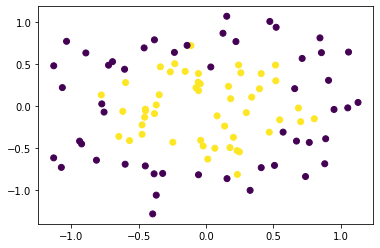

LR accuracy: 0.31
RF accuracy: 0.8699999999999999


In [1]:
# The biggest advantage of Random Forests is that they generally perform well without any tuning
# They will also perform decently well on almost every dataset.
# A linear model, on the other hand, cannot perform well on a dataset that cannot be split with a line.

from sklearn.datasets import make_circles
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

X, y = make_circles(noise=0.2, factor=0.5, random_state=1) # 'make_circles' generates a classification dataset with concentric circles. 
                                                           # assign generated samples to X, corresponding class memberships to y

plt.scatter(X[:,0], X[:,1], c=y) # scatter plot of the dataset. 
                                 # each sample X has two columns (features). assign first column to x-axis, second column to y-axis
                                 # 'c=' color datapoints by class membership (target, two labels 0 or 1)
plt.show()

# ^It is not possible to split this dataset with a line without manipulating the features.
#  However, a random forest will perform just fine on this dataset.


# kfold cross validation to compare accuracy scores
kf = KFold(n_splits=5, shuffle=True, random_state=2) # instantiate Kfold object 'kf' w/ 5 folds, 'shuffle' randomizes order, 'random_state' holds the shuffle
lr_scores = [] # empty list for logistic regression scores
rf_scores = [] # empty list for random forest scores
for train_index, test_index in kf.split(X): # 'split()' method creates the splits, outputs a generator, pass features X. 
                                            # for loop using training and testing indices generated for each fold
    X_train, X_test = X[train_index], X[test_index] # train/test-split for each fold..
    y_train, y_test = y[train_index], y[test_index] # ..using training and testing indices 
    lr = LogisticRegression() # instantiate logistic regression model for each fold
    lr.fit(X_train, y_train) # fit each model
    lr_scores.append(lr.score(X_test, y_test)) # add each models accuracy scores to list
    rf = RandomForestClassifier(random_state=3) # instantiate random forest model for each fold
    rf.fit(X_train, y_train) # fit each model
    rf_scores.append(rf.score(X_test, y_test)) # add each models accuracy scores to list
print("LR accuracy:", np.mean(lr_scores)) # mean of all 5 logistic regression model's scores (cross-validated score)
print("RF accuracy:", np.mean(rf_scores)) # mean of all 5 random forest model's scores (cross-validated score)


In [2]:
# same thing with cross_val_score shortcut
lr = LogisticRegression() # instantiate logistic regression model
rf = RandomForestClassifier(random_state=3) # instantiate random forest model, same random state as in the above loop
lr_scores = cross_val_score(lr, X, y, cv=kf) # pass logistic regression model, all features 'X', all targets 'y' 
                                             # 'cv=' means number of folds. Instead of passing an integer, here we pass 'kf', the 'KFold' object that was initiated earlier
                                             # 'cross_val_score' will automatically create a train/test-split for each fold, instantiate a model for each fold, fit each model, and output each model's accuracy score
rf_scores = cross_val_score(rf, X, y, cv=kf) # same above, this time passing random forest model
print("LR accuracy:", np.mean(lr_scores)) # mean of all 5 logistic regression model's scores (cross-validated score)
print("RF accuracy:", np.mean(rf_scores)) # mean of all 5 random forest model's scores (cross-validated score)

# We see that the Logistic Regression model performs worse than random guessing but the Random Forest model performs quite well
# When looking to get a benchmark for a new classification problem, it is common practice to start by building a Logistic Regression model and a Random Forest model as these two models both have potential to perform well without tuning
# This will give you values for your metrics to try to beat. Oftentimes it is almost impossible to do better than these benchmarks

# code and comments by github.com/alandavidgrunberg


LR accuracy: 0.31
RF accuracy: 0.8699999999999999
